# John's Plotting Code to take a look at the CER timeseries data 
https://github.com/johncramblitt/Cle-Elum-Ridge/blob/main/Plots_and_Visualization.ipynb\
env: running with **raster** right now since I do not need rioxarray

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

In [2]:
# John's imports 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime as datetime
from matplotlib import dates
import seaborn as sns 
from mpl_toolkits.axes_grid1 import make_axes_locatable

Open CSVs using code from John's Github, starting here

In [3]:
#import csv file for Site Openness and Snow Disappearance
results = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\GapFraction_SDD.csv")

#make sure all dates are type datetime
results['SDD1'] = pd.to_datetime(results['SDD1'])
results['SDD2'] = pd.to_datetime(results['SDD2'])
results['SDD3'] = pd.to_datetime(results['SDD3'])
results['SDD4'] = pd.to_datetime(results['SDD4'])
results['SDD5'] = pd.to_datetime(results['SDD5'])
results['SDD6'] = pd.to_datetime(results['SDD6'])
results['SDD7'] = pd.to_datetime(results['SDD7'])
results['SDD8'] = pd.to_datetime(results['SDD8'])
results['SDD9'] = pd.to_datetime(results['SDD9'])

#create variables containing results for north and south respectively
CNresults = results.loc[results['Site'] == "CN"]
CSresults = results.loc[results['Site'] == "CS"]

In [4]:
# Our current folder, 
# C:\Users\Lumbr\OneDrive - UW\Documents\Washington\EasternCascades\Python\CER_Timeseries_Anaylsis

# Folder that the data is in, 
# E:\CassieLumbrazo\Data\field_data_proccessed_byJohn\FinalData\ProcessedCameraData\

CN20 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-20ProcessedData.csv")
CN50 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-50ProcessedData.csv")
CN60 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-60ProcessedData.csv")
CN70 = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-70ProcessedData.csv")
CNG  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-GProcessedData.csv")
CNF  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CN-FProcessedData.csv")

CS20   = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-20ProcessedData.csv")
CS50    = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-50ProcessedData.csv")
CS60   = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-60ProcessedData.csv")
CS120  = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-120ProcessedData.csv")
CSG    = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-GProcessedData.csv")
CSF    = pd.read_csv("E:\\CassieLumbrazo\\Data\\field_data_proccessed_byJohn\\FinalData\\ProcessedCameraData\\CS-FProcessedData.csv")


In [5]:
CNG['Date'] = pd.to_datetime(CNG['Date'])
CNF['Date'] = pd.to_datetime(CNF['Date'])
CN20['Date'] = pd.to_datetime(CN20['Date'])
CN50['Date'] = pd.to_datetime(CN50['Date'])
CN60['Date'] = pd.to_datetime(CN60['Date'])
CN70['Date'] = pd.to_datetime(CN70['Date'])

CSG['Date'] = pd.to_datetime(CSG['Date'])
CSF['Date'] = pd.to_datetime(CSF['Date'])
CS20['Date'] = pd.to_datetime(CS20['Date'])
CS50['Date'] = pd.to_datetime(CS50['Date'])
CS60['Date'] = pd.to_datetime(CS60['Date'])
CS120['Date'] = pd.to_datetime(CS120['Date'])

In [6]:
#Calculate statistics for snow depth (minimum depth, maximum depth, and median depth)
#Because there are only three poles for each site, each statistic represents the value of a single pole
CNF['Median_depth'] = CNF[["Pole1","Pole2","Pole3"]].median(axis=1)
CNF['Maximum_depth'] = CNF[["Pole1","Pole2","Pole3"]].max(axis=1)
CNF['Minimum_depth'] = CNF[["Pole1","Pole2","Pole3"]].min(axis=1)
CNG['Median_depth'] = CNG[["Pole1","Pole2","Pole3"]].median(axis=1)
CNG['Maximum_depth'] = CNG[["Pole1","Pole2","Pole3"]].max(axis=1)
CNG['Minimum_depth'] = CNG[["Pole1","Pole2","Pole3"]].min(axis=1)
CN20['Median_depth'] = CN20[["Pole1","Pole2","Pole3"]].median(axis=1)
CN20['Maximum_depth'] = CN20[["Pole1","Pole2","Pole3"]].max(axis=1)
CN20['Minimum_depth'] = CN20[["Pole1","Pole2","Pole3"]].min(axis=1)
CN50['Median_depth'] = CN50[["Pole1","Pole2","Pole3"]].median(axis=1)
CN50['Maximum_depth'] = CN50[["Pole1","Pole2","Pole3"]].max(axis=1)
CN50['Minimum_depth'] = CN50[["Pole1","Pole2","Pole3"]].min(axis=1)
CN60['Median_depth'] = CN60[["Pole1","Pole2","Pole3"]].median(axis=1)
CN60['Maximum_depth'] = CN60[["Pole1","Pole2","Pole3"]].max(axis=1)
CN60['Minimum_depth'] = CN60[["Pole1","Pole2","Pole3"]].min(axis=1)
CN70['Median_depth'] = CN70[["Pole1","Pole2","Pole3"]].median(axis=1)
CN70['Maximum_depth'] = CN70[["Pole1","Pole2","Pole3"]].max(axis=1)
CN70['Minimum_depth'] = CN70[["Pole1","Pole2","Pole3"]].min(axis=1)
CSF['Median_depth'] = CSF[["Pole1","Pole2","Pole3"]].median(axis=1)
CSF['Maximum_depth'] = CSF[["Pole1","Pole2","Pole3"]].max(axis=1)
CSF['Minimum_depth'] = CSF[["Pole1","Pole2","Pole3"]].min(axis=1)
CSG['Median_depth'] = CSG[["Pole1","Pole2","Pole3"]].median(axis=1)
CSG['Maximum_depth'] = CSG[["Pole1","Pole2","Pole3"]].max(axis=1)
CSG['Minimum_depth'] = CSG[["Pole1","Pole2","Pole3"]].min(axis=1)
CS20['Median_depth'] = CS20[["Pole1","Pole2","Pole3"]].median(axis=1)
CS20['Maximum_depth'] = CS20[["Pole1","Pole2","Pole3"]].max(axis=1)
CS20['Minimum_depth'] = CS20[["Pole1","Pole2","Pole3"]].min(axis=1)
CS50['Median_depth'] = CS50[["Pole1","Pole2","Pole3"]].median(axis=1)
CS50['Maximum_depth'] = CS50[["Pole1","Pole2","Pole3"]].max(axis=1)
CS50['Minimum_depth'] = CS50[["Pole1","Pole2","Pole3"]].min(axis=1)
CS60['Median_depth'] = CS60[["Pole1","Pole2","Pole3"]].median(axis=1)
CS60['Maximum_depth'] = CS60[["Pole1","Pole2","Pole3"]].max(axis=1)
CS60['Minimum_depth'] = CS60[["Pole1","Pole2","Pole3"]].min(axis=1)
CS120['Median_depth'] = CS120[["Pole1","Pole2","Pole3"]].median(axis=1)
CS120['Maximum_depth'] = CS120[["Pole1","Pole2","Pole3"]].max(axis=1)
CS120['Minimum_depth'] = CS120[["Pole1","Pole2","Pole3"]].min(axis=1)

Text(0.5, 1.0, 'Snow Depth at Cle Elum Ridge Site CN-60 During Water Year 2023')

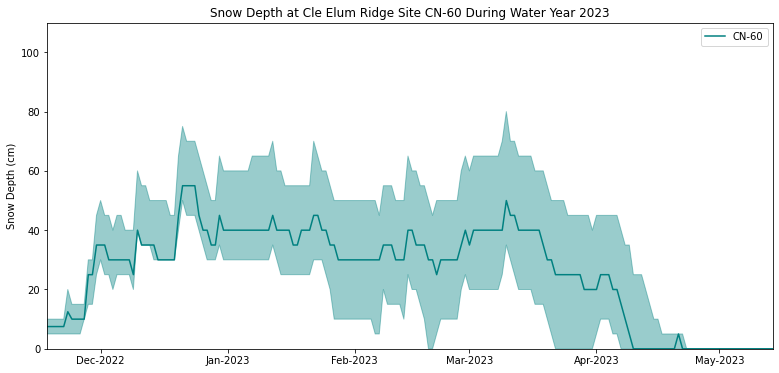

In [7]:
#code to graph snow depth at a single pole. Code for all poles is included but commented out for use when needed.
#Maximum and minimum depth are taken from the statistics calculated above

fig, ax = plt.subplots(figsize = (13,6))
#ax.fill_between(CNF['Date'], CNF['Maximum_depth'], CNF['Minimum_depth'], color = "green", alpha = 0.4 )
#ax.fill_between(CNG['Date'], CNG['Maximum_depth'], CNG['Minimum_depth'], color = "red", alpha = 0.4 )
#ax.fill_between(CN20['Date'], CN20['Maximum_depth'], CN20['Minimum_depth'], color = "pink", alpha = 0.4 )
#ax.fill_between(CN50['Date'], CN50['Maximum_depth'], CN50['Minimum_depth'], color = "blue", alpha = 0.4 )
ax.fill_between(CN60['Date'], CN60['Maximum_depth'], CN60['Minimum_depth'], color = "teal", alpha = 0.4 )
#ax.fill_between(CN70['Date'], CN70['Maximum_depth'], CN70['Minimum_depth'], color = "orange", alpha = 0.4 )
#ax.fill_between(CS50['Date'], CS50['Maximum_depth'], CS50['Minimum_depth'], color = "blue", alpha = 0.4 )
#ax.fill_between(CS20['Date'], CS20['Maximum_depth'], CS20['Minimum_depth'], color = "pink", alpha = 0.4 )
#ax.fill_between(CS60['Date'], CS60['Maximum_depth'], CS60['Minimum_depth'], color = "teal", alpha = 0.4 )
#ax.fill_between(CSF['Date'], CSF['Maximum_depth'], CSF['Minimum_depth'], color = "green", alpha = 0.4 )
#ax.fill_between(CSG['Date'], CSG['Maximum_depth'], CSG['Minimum_depth'], color = "red", alpha = 0.4 )
#ax.fill_between(CS120['Date'], CS120['Maximum_depth'], CS120['Minimum_depth'], color = "orange", alpha = 0.4 )

#ax.plot(CNF['Date'], CNF['Median_depth'], label = "CN-F", color = "green")
#ax.plot(CNG['Date'], CNG['Median_depth'], label = "CN-G", color = "red")
#ax.plot(CN20['Date'], CN20['Median_depth'], label = "CN-20", color = "pink")
#ax.plot(CN50['Date'], CN50['Median_depth'], label = "CN-50", color = "blue")
ax.plot(CN60['Date'], CN60['Median_depth'], label = "CN-60", color = "teal")
#ax.plot(CN70['Date'], CN70['Median_depth'], label = "CN-70", color = "orange")
#ax.plot(CS20['Date'], CS20['Median_depth'], label = "CS-20", color = "pink")
#ax.plot(CS50['Date'], CS50['Median_depth'], label = "CS-50", color = "blue")
#ax.plot(CS60['Date'], CS60['Median_depth'], label = "CS-60", color = "teal")
#ax.plot(CSF['Date'], CSF['Median_depth'], label = "CS-F", color = "green")
#ax.plot(CSG['Date'], CSG['Median_depth'], label = "CS-G", color = "red")
#ax.plot(CS120['Date'], CS120['Median_depth'], label = "CS-120", color = "orange")


ax.set_ylim(0,110)
ax.set_xlim([datetime.date(2022, 11, 18), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax.set_ylabel("Snow Depth (cm)")
plt.legend()
plt.title("Snow Depth at Cle Elum Ridge Site CN-60 During Water Year 2023")

Text(0.5, 1.0, 'Snow Depth at Cle Elum Ridge North Sites (WY 2023)')

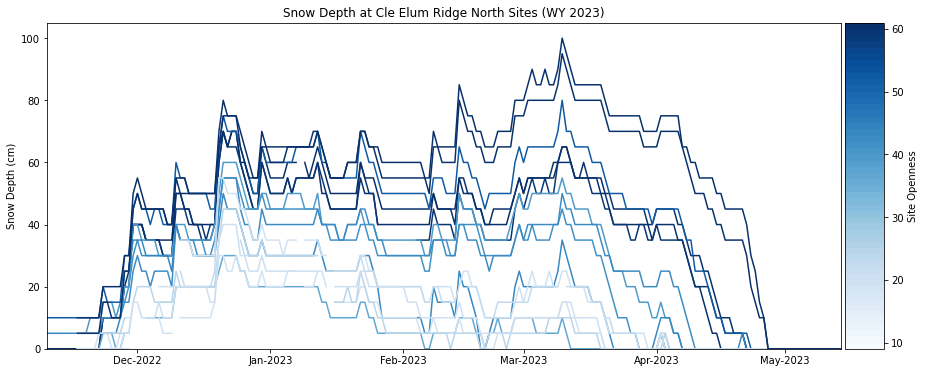

In [8]:
#Python will output an error message after running this code because future versions of pandas will not support the int(CNresults.loc[]) code that I used.
#I believe the int() part is what will break it, but I don't know how to fix this. Any feedback is welcome

fig, ax = plt.subplots(figsize = (15,6))
#The following code sets up the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(CNresults['SiteOpennessAdjusted'].max())-int(CNresults['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Blues', N)
norm = mpl.colors.Normalize(vmin=int(CNresults['SiteOpennessAdjusted'].min()), vmax=int(CNresults['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = "Site Openness")

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax.plot(CN20['Date'], CN20['Pole1'], label = "CN-20-pole1", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN20['Date'], CN20['Pole2'], label = "CN-20-pole2", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN20['Date'], CN20['Pole3'], label = "CN-20-pole3", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'])))

ax.plot(CN50['Date'], CN50['Pole1'], label = "CN-50-pole1", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN50['Date'], CN50['Pole2'], label = "CN-50-pole2", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN50['Date'], CN50['Pole3'], label = "CN-50-pole3", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'])))

ax.plot(CN60['Date'], CN60['Pole1'], label = "CN-60-pole1", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN60['Date'], CN60['Pole2'], label = "CN-60-pole2", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN60['Date'], CN60['Pole3'], label = "CN-60-pole3", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'])))

ax.plot(CN70['Date'], CN70['Pole1'], label = "CN-70-pole1", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'])))
ax.plot(CN70['Date'], CN70['Pole2'], label = "CN-70-pole2", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'])))
ax.plot(CN70['Date'], CN70['Pole3'], label = "CN-70-pole3", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'])))

ax.plot(CNF['Date'], CNF['Pole1'], label = "CN-F-pole1", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'])))
ax.plot(CNF['Date'], CNF['Pole2'], label = "CN-F-pole2", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'])))
ax.plot(CNF['Date'], CNF['Pole3'], label = "CN-F-pole3", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'])))

ax.plot(CNG['Date'], CNG['Pole1'], label = "CN-G-pole1", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'])))
ax.plot(CNG['Date'], CNG['Pole2'], label = "CN-G-pole2", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'])))
ax.plot(CNG['Date'], CNG['Pole3'], label = "CN-G-pole3", c=cmap(int(CNresults.loc[CNresults['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'])))

ax.set_ylim(0,105)
ax.set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax.set_ylabel("Snow Depth (cm)")
ax.set_title("Snow Depth at Cle Elum Ridge North Sites (WY 2023)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Snow Depth at Cle Elum Ridge South Sites (WY 2023)')

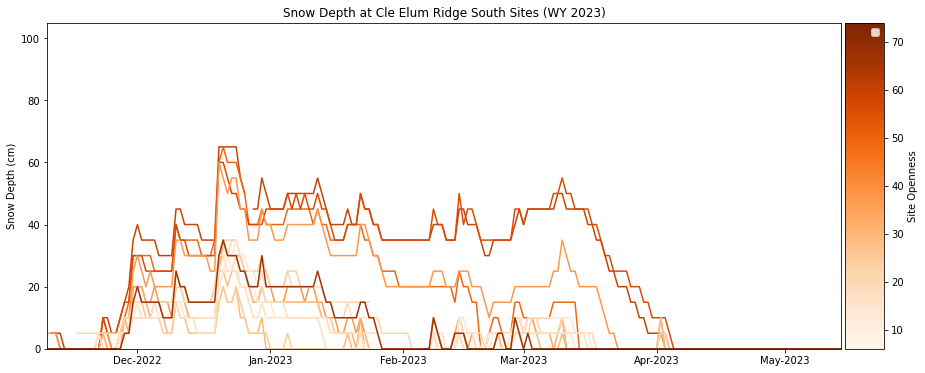

In [9]:
#Python will output an error message after running this code because future versions of pandas will not support the int(CNresults.loc[]) code that I used.
#I believe the int() part is what will break it, but I don't know how to fix this. Any feedback is welcome

fig, ax = plt.subplots(figsize = (15,6))
#The following code sets up the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
N = int(CSresults['SiteOpennessAdjusted'].max())-int(CSresults['SiteOpennessAdjusted'].min())
cmap = plt.get_cmap('Oranges', N)
norm = mpl.colors.Normalize(vmin=int(CSresults['SiteOpennessAdjusted'].min()), vmax=int(CSresults['SiteOpennessAdjusted'].max()))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, cax = cax, label = 'Site Openness')

#These plot depth vs. date for each pole over the water year. An integer value of site openness % for each pole is used for the colorbar
ax.plot(CS20['Date'], CS20['Pole1'], label = "CS-20-pole1", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS20['Date'], CS20['Pole2'], label = "CS-20-pole2", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS20['Date'], CS20['Pole3'], label = "CS-20-pole3", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'])))

ax.plot(CS50['Date'], CS50['Pole1'], label = "CS-50-pole1", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS50['Date'], CS50['Pole2'], label = "CS-50-pole2", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS50['Date'], CS50['Pole3'], label = "CS-50-pole3", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'])))

ax.plot(CS60['Date'], CS60['Pole1'], label = "CS-60-pole1", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS60['Date'], CS60['Pole2'], label = "CS-60-pole2", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS60['Date'], CS60['Pole3'], label = "CS-60-pole3", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'])))

ax.plot(CS120['Date'], CS120['Pole1'], label = "CS-120-pole1", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'])))
ax.plot(CS120['Date'], CS120['Pole2'], label = "CS-120-pole2", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'])))
ax.plot(CS120['Date'], CS120['Pole3'], label = "CS-120-pole3", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'])))

ax.plot(CSF['Date'], CSF['Pole1'], label = "CS-F-pole1", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-F-pole1",'SiteOpennessAdjusted'])))
ax.plot(CSF['Date'], CSF['Pole2'], label = "CS-F-pole2", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-F-pole2",'SiteOpennessAdjusted'])))
ax.plot(CSF['Date'], CSF['Pole3'], label = "CS-F-pole3", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-F-pole3",'SiteOpennessAdjusted'])))

ax.plot(CSG['Date'], CSG['Pole1'], label = "CS-G-pole1", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-G-pole1",'SiteOpennessAdjusted'])))
ax.plot(CSG['Date'], CSG['Pole2'], label = "CS-G-pole2", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-G-pole2",'SiteOpennessAdjusted'])))
#ax.plot(CSG['Date'], CSG['Pole3'], label = "CS-G-pole3", c=cmap(int(CSresults.loc[CSresults['LocationID'] == "CS-G-pole3",'SiteOpennessAdjusted'])))
#there is no site openness value for the above pole and therefore it is excluded from the plot

ax.set_ylim(0,105)
ax.set_xlim([datetime.date(2022, 11, 10), datetime.date(2023, 5, 14)])
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%Y'))
ax.set_ylabel("Snow Depth (cm)")
plt.legend()
ax.set_title("Snow Depth at Cle Elum Ridge South Sites (WY 2023)")

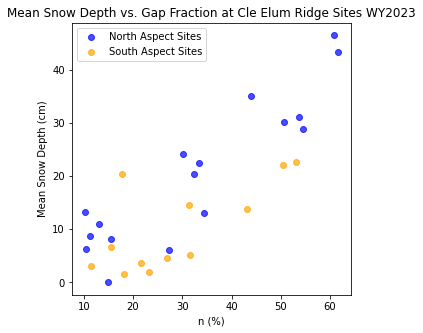

In [10]:
fig, ax = plt.subplots(figsize = (5,5))

#grabbing the site openness for each locationID and plotting it against the mean snow depth for the corresponding pole
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'], CN20['Pole1'].mean(), c = 'blue', label = "North Aspect Sites", alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'], CN20['Pole2'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'], CN20['Pole3'].mean(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'], CN50['Pole1'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'], CN50['Pole2'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'], CN50['Pole3'].mean(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'], CN60['Pole1'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'], CN60['Pole2'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'], CN60['Pole3'].mean(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'], CN70['Pole1'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'], CN70['Pole2'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'], CN70['Pole3'].mean(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'], CNF['Pole1'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'], CNF['Pole2'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'], CNF['Pole3'].mean(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'], CNG['Pole1'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'], CNG['Pole2'].mean(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'], CNG['Pole3'].mean(), c = 'blue', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'], CS20['Pole1'].mean(), c = 'orange', label = "South Aspect Sites", alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'], CS20['Pole2'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'], CS20['Pole3'].mean(), c = 'orange', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'], CS50['Pole1'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'], CS50['Pole2'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'], CS50['Pole3'].mean(), c = 'orange', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'], CS60['Pole1'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'], CS60['Pole2'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'], CS60['Pole3'].mean(), c = 'orange', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'], CS120['Pole1'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'], CS120['Pole2'].mean(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'], CS120['Pole3'].mean(), c = 'orange', alpha = 0.7)

plt.ylabel("Mean Snow Depth (cm)")
plt.xlabel("n (%)")
plt.title("Mean Snow Depth vs. Gap Fraction at Cle Elum Ridge Sites WY2023")
plt.legend()

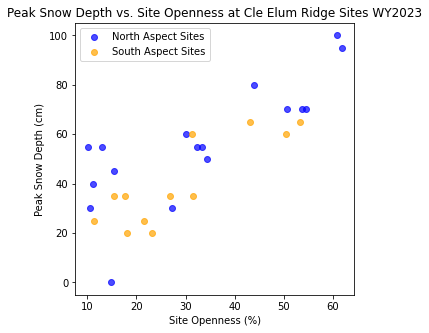

In [11]:
fig, ax = plt.subplots(figsize = (5,5))

#grabbing the site openness for each locationID and plotting it against the max snow depth for the corresponding pole
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-20-pole1",'SiteOpennessAdjusted'], CN20['Pole1'].max(), c = 'blue', label = "North Aspect Sites", alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-20-pole2",'SiteOpennessAdjusted'], CN20['Pole2'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-20-pole3",'SiteOpennessAdjusted'], CN20['Pole3'].max(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-50-pole1",'SiteOpennessAdjusted'], CN50['Pole1'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-50-pole2",'SiteOpennessAdjusted'], CN50['Pole2'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-50-pole3",'SiteOpennessAdjusted'], CN50['Pole3'].max(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-60-pole1",'SiteOpennessAdjusted'], CN60['Pole1'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-60-pole2",'SiteOpennessAdjusted'], CN60['Pole2'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-60-pole3",'SiteOpennessAdjusted'], CN60['Pole3'].max(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-70-pole1",'SiteOpennessAdjusted'], CN70['Pole1'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-70-pole2",'SiteOpennessAdjusted'], CN70['Pole2'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-70-pole3",'SiteOpennessAdjusted'], CN70['Pole3'].max(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-F-pole1",'SiteOpennessAdjusted'], CNF['Pole1'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-F-pole2",'SiteOpennessAdjusted'], CNF['Pole2'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-F-pole3",'SiteOpennessAdjusted'], CNF['Pole3'].max(), c = 'blue', alpha = 0.7)

plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-G-pole1",'SiteOpennessAdjusted'], CNG['Pole1'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-G-pole2",'SiteOpennessAdjusted'], CNG['Pole2'].max(), c = 'blue', alpha = 0.7)
plt.scatter(CNresults.loc[CNresults['LocationID'] == "CN-G-pole3",'SiteOpennessAdjusted'], CNG['Pole3'].max(), c = 'blue', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-20-pole1",'SiteOpennessAdjusted'], CS20['Pole1'].max(), c = 'orange', label = "South Aspect Sites", alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-20-pole2",'SiteOpennessAdjusted'], CS20['Pole2'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-20-pole3",'SiteOpennessAdjusted'], CS20['Pole3'].max(), c = 'orange', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-50-pole1",'SiteOpennessAdjusted'], CS50['Pole1'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-50-pole2",'SiteOpennessAdjusted'], CS50['Pole2'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-50-pole3",'SiteOpennessAdjusted'], CS50['Pole3'].max(), c = 'orange', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-60-pole1",'SiteOpennessAdjusted'], CS60['Pole1'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-60-pole2",'SiteOpennessAdjusted'], CS60['Pole2'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-60-pole3",'SiteOpennessAdjusted'], CS60['Pole3'].max(), c = 'orange', alpha = 0.7)

plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-120-pole1",'SiteOpennessAdjusted'], CS120['Pole1'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-120-pole2",'SiteOpennessAdjusted'], CS120['Pole2'].max(), c = 'orange', alpha = 0.7)
plt.scatter(CSresults.loc[CSresults['LocationID'] == "CS-120-pole3",'SiteOpennessAdjusted'], CS120['Pole3'].max(), c = 'orange', alpha = 0.7)

plt.ylabel("Peak Snow Depth (cm)")
plt.xlabel("Site Openness (%)")
plt.title("Peak Snow Depth vs. Site Openness at Cle Elum Ridge Sites WY2023")
plt.legend()

### Note for the following plots:
During the early season in November, snow sometimes accumulated and then melted out, resulting in snow disapprance dates very early in the season. I chose to not include these early season melt outs, and as a result, I only used snow disappearance dates after December 1st.

To explain how I made this adjustment, I first need to explain why there are columns in the master csv file for SDD1, SDD2, SDD3, etc. Snow disapperance dates are characterized a day with no snow present, while snow was present the previous day. For most poles and temperature stakes, this occured multiple times. SDD1 corresponds to the first snow disappreance date, SDD2 corresponds to the second, etc.

To exclude November snow disappearance dates for the plots below, I used the first SDD for each pole/stake after December 1st. To find this date, I created three variables, CNresults_SDD1, CNresults_SDD2, and CNresults_SDD3 (I created the same variables for CS as well). CNresults_SDD1 includes the value from the SDD1 column if it is after Dec 1st. CNresults_SDD2 includes dates from the SDD2 column if the SDD1 column is before Dec 1 and the SDD2 columns is after Dec 1. CNresults_SDD3 includes dates from the SDD3 column if both the SDD1 and SDD2 columns are before Dec 1. No site had a more than two snow disappearance dates in November, so I did not need to continue this pattern.

I then plotted all three variables to grab the snow disapprance dates after Dec 1, and their corresponding Site Openness Fraction

In [12]:
CNresults_SDD3 = CNresults.loc[(CNresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CNresults['SDD2'] <= datetime.datetime(2022,12,1))]
CNresults_SDD2 = CNresults.loc[(CNresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CNresults['SDD2'] >= datetime.datetime(2022,12,1))]
CNresults_SDD1 = CNresults.loc[(CNresults['SDD1'] >= datetime.datetime(2022,12,1))]

CSresults_SDD3 = CSresults.loc[(CSresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CSresults['SDD2'] <= datetime.datetime(2022,12,1))]
CSresults_SDD2 = CSresults.loc[(CSresults['SDD1'] <= datetime.datetime(2022,12,1)) & (CSresults['SDD2'] >= datetime.datetime(2022,12,1))]
CSresults_SDD1 = CSresults.loc[(CSresults['SDD1'] >= datetime.datetime(2022,12,1))]

Text(0.5, 1.0, 'Site Openness vs. Snow Disappearance Date at Cle Elum Ridge North Sites')

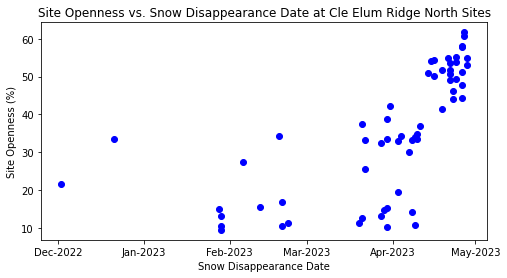

In [13]:
fig, ax = plt.subplots(figsize = (8,4))

plt.scatter(CNresults_SDD1['SDD1'], CNresults_SDD1['SiteOpennessAdjusted'], color = 'blue')
plt.scatter(CNresults_SDD2['SDD2'], CNresults_SDD2['SiteOpennessAdjusted'], color = 'blue')
plt.scatter(CNresults_SDD3['SDD3'], CNresults_SDD3['SiteOpennessAdjusted'], color = 'blue')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%Y'))
plt.ylabel("Site Openness (%)")
plt.xlabel("Snow Disappearance Date")
plt.title("Site Openness vs. Snow Disappearance Date at Cle Elum Ridge North Sites")

Text(0.5, 1.0, 'Site Openness vs. Snow Disappearance Date at Cle Elum Ridge South Sites')

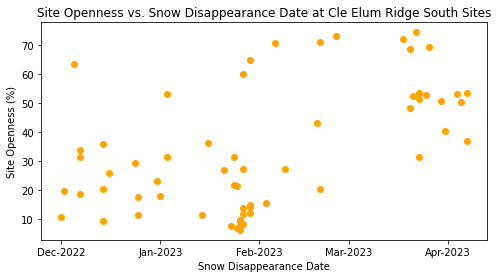

In [14]:
fig, ax = plt.subplots(figsize = (8,4))

plt.scatter(CSresults_SDD1['SDD1'], CSresults_SDD1['SiteOpennessAdjusted'], color = 'orange')
plt.scatter(CSresults_SDD2['SDD2'], CSresults_SDD2['SiteOpennessAdjusted'], color = 'orange')
plt.scatter(CSresults_SDD3['SDD3'], CSresults_SDD3['SiteOpennessAdjusted'], color = 'orange')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b-%Y'))
plt.ylabel("Site Openness (%)")
plt.xlabel("Snow Disappearance Date")
plt.title("Site Openness vs. Snow Disappearance Date at Cle Elum Ridge South Sites")

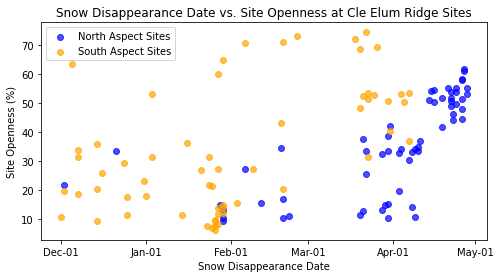

In [15]:
fig, ax = plt.subplots(figsize = (8,4))

plt.scatter(CNresults_SDD1['SDD1'], CNresults_SDD1['SiteOpennessAdjusted'], color = 'blue', alpha = 0.7, label = "North Aspect Sites")
plt.scatter(CNresults_SDD2['SDD2'], CNresults_SDD2['SiteOpennessAdjusted'], color = 'blue', alpha = 0.7)
plt.scatter(CNresults_SDD3['SDD3'], CNresults_SDD3['SiteOpennessAdjusted'], color = 'blue', alpha = 0.7)

plt.scatter(CSresults_SDD1['SDD1'], CSresults_SDD1['SiteOpennessAdjusted'], color = 'orange', alpha = 0.7, label = "South Aspect Sites")
plt.scatter(CSresults_SDD2['SDD2'], CSresults_SDD2['SiteOpennessAdjusted'], color = 'orange', alpha = 0.7)
plt.scatter(CSresults_SDD3['SDD3'], CSresults_SDD3['SiteOpennessAdjusted'], color = 'orange', alpha = 0.7)

ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%d'))
plt.ylabel("Site Openness (%)")
plt.xlabel("Snow Disappearance Date")
plt.title("Snow Disappearance Date vs. Site Openness at Cle Elum Ridge Sites")
plt.legend(loc = "upper left")

Text(0.5, 1.0, 'Site Openness (%) vs. Basal Area Factor')

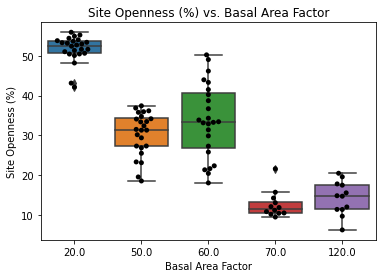

In [16]:
#simple boxplot and swarmplot to compare basal area factor to site opennes (%)
sns.boxplot(x = results['BAF'],y = results['SiteOpennessAdjusted'])
sns.swarmplot(x = results['BAF'],y = results['SiteOpennessAdjusted'], color = 'black')

plt.xlabel("Basal Area Factor")
plt.ylabel("Site Openness (%)")
plt.title("Site Openness (%) vs. Basal Area Factor")

Write the cleaned dataset to a netcdf to open later

In [17]:
ds.to_netcdf('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/cer_smalldomain_create_netcdf.nc')

NameError: name 'ds' is not defined

In [ ]:
ds2 = xr.open_dataset('/Users/Lumbr/OneDrive - UW/Documents/Washington/EasternCascades/Python/Output/cer_smalldomain_create_netcdf.nc')
ds2

<xarray.Dataset>
Dimensions:                         (x: 736, y: 649, band: 1)
Coordinates:
  * x                               (x) float64 1.528e+06 1.528e+06 ... 1.53e+06
  * y                               (y) float64 6.914e+05 ... 6.894e+05
  * band                            (band) int32 1
Data variables: (12/32)
    snowdepth                       (band, y, x) float32 ...
    dce                             (band, y, x) float32 ...
    slope                           (band, y, x) float32 ...
    aspect                          (band, y, x) float32 ...
    dah                             (band, y, x) float32 ...
    dce_giulia                      (band, y, x) float32 ...
    ...                              ...
    canopyedges_negdah_snowdepth    (band, y, x) float32 ...
    smallgaps_posdah_snowdepth      (band, y, x) float32 ...
    smallgaps_negdah_snowdepth      (band, y, x) float32 ...
    largegaps_posdah_snowdepth      (band, y, x) float32 ...
    largegaps_negdah_snowdepth      (band, y, x) float32 ...
    spatial_ref                     int32 ...